Gold 19 yr Simluation
==============

This python notebook simulates the ARTH price given gold's price from Sept 2001 - Sept 2020

---

## Simluation Results

Below we simulate the simple indicator with a starting index of 2$ and taking in Gold's daily price from Sept 2001 to Sept 2020 (Roughly 19 yearsof data). We make the following observations from the graphs below

- The indicator succesfully appreciates in a bull market but remains stable in a bear market.
- The indicator ends at a value of 3.66 which is roughly a 55% appreciation over 19 years
- During this period, the CPI appreciated by roughly 39%, which means that ARTH would've protected its users from inflation with an extra 17%

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# fetch the last few prices of bitcoin
data = pd.read_csv('data/gold_price.csv')

# The dampening factor determines how much we will appreciate ARTH by based on the 
# growth of ETH & BTC. In this case it is roughly 10%
DAMPENING_FACTOR = 0.1

MOVING_AVERAGE_LONG_DURATION = 30
MOVING_AVERAGE_SHORT_DURATION = 7

data

,date,open,high,low,close,adj close,volume
0,2001-09-17,57.509998,58.959999,56.680000,56.889999,56.889999,13850000.0
1,2001-09-18,56.810001,57.520000,55.759998,57.520000,57.520000,11470000.0
2,2001-09-19,57.480000,58.700001,57.360001,57.730000,57.730000,12600000.0
3,2001-09-20,57.610001,59.310001,57.430000,59.310001,59.310001,12050000.0
4,2001-09-21,60.080002,60.439999,57.980000,58.200001,58.200001,13140000.0
...,...,...,...,...,...,...,...
4777,2020-09-08,145.399994,151.050003,143.199997,147.979996,147.979996,0.0
4778,2020-09-09,149.729996,155.179993,149.710007,154.800003,154.800003,0.0
4779,2020-09-10,155.880005,157.000000,151.710007,152.339996,152.339996,0.0
4780,2020-09-11,153.490005,155.429993,149.860001,150.339996,150.339996,0.0


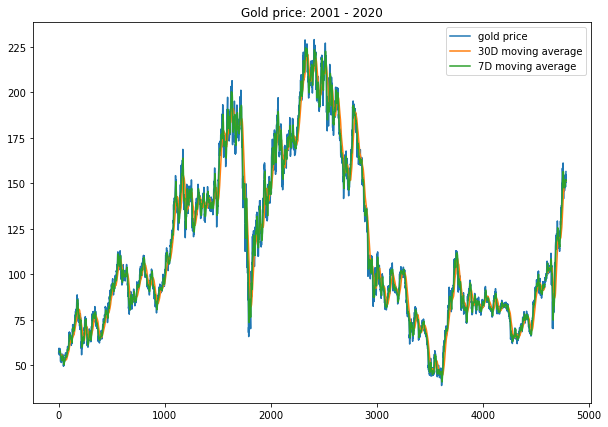

In [11]:
data['30d_ma'] = data['close'].rolling(MOVING_AVERAGE_LONG_DURATION).mean()
data['7d_ma'] = data['close'].rolling(MOVING_AVERAGE_SHORT_DURATION).mean()

plt.figure(figsize=(10, 7))

plt.plot(data['close'])
plt.plot(data['30d_ma'])
plt.plot(data['7d_ma'])

plt.legend(['gold price', '30D moving average', '7D moving average'])
plt.title("Gold price: 2001 - 2020")
plt.show()

Text(0.5, 1.0, 'slope of 30d & 7d moving averages')

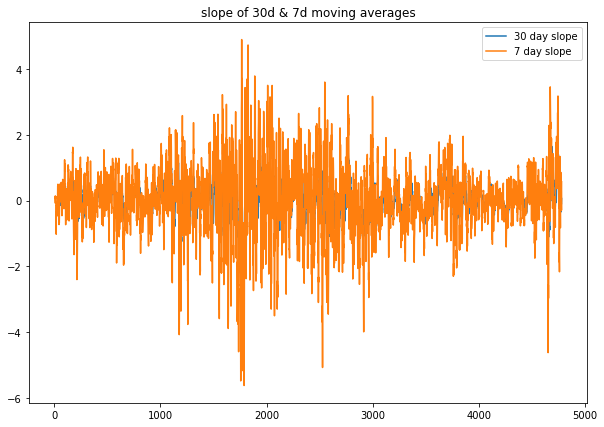

In [12]:
# calculate the slope of each pt/day
def get_slope_trend (_data):
  dailyPriceDelta = [0]
  for i in range(len(data.index)):
    if i!= 0:
      diff = (data.loc[i, _data] - data.loc[i - 1, _data])
      dailyPriceDelta.append(diff)
  return dailyPriceDelta  

data['slope_30d'] = get_slope_trend('30d_ma')
data['slope_7d'] = get_slope_trend('7d_ma')

plt.figure(figsize=(10, 7))
plt.plot(data['slope_30d'])
plt.plot(data['slope_7d'])

plt.legend(['30 day slope', '7 day slope'])
plt.title("slope of 30d & 7d moving averages")

In [13]:
price30d = np.array(data['30d_ma'])
price7d = np.array(data['7d_ma'])
trend = [2] * MOVING_AVERAGE_LONG_DURATION

# Ptn will help us attain the memory part of thresholds
# assuming we start in the middle region
for i in range(MOVING_AVERAGE_LONG_DURATION, len(price30d)):
  # If we are going to change the price, check if both the 30d and 7d price are
  # appreciating
  if (price30d[i] > price30d[i - 1] and price7d[i] > price7d[i - 1]):
    delta = price30d[i] - price30d[i - 1]
    percentageChange = delta / price30d[i - 1] 

    # dampen the change; say we will only appreciate ARTH by 10% of the bitcoin appreciation
    dampnedChange = percentageChange * DAMPENING_FACTOR
    trend.append(trend[i -1] * (1 + dampnedChange))

  # dont' change the price
  else:
    trend.append(trend[i - 1])

data['trend'] = trend
data[MOVING_AVERAGE_LONG_DURATION:]


,date,open,high,low,close,adj close,volume,30d_ma,7d_ma,slope_30d,slope_7d,trend
30,2001-10-29,53.130001,53.790001,52.990002,53.029999,53.029999,7690000.0,55.568000,52.507143,-0.128667,-0.148572,2.000000
31,2001-10-30,53.610001,55.000000,53.459999,54.520000,54.520000,9120000.0,55.468000,52.761428,-0.100000,0.254285,2.000000
32,2001-10-31,54.450001,54.619999,53.669998,54.529999,54.529999,7860000.0,55.361333,53.197143,-0.106667,0.435714,2.000000
33,2001-11-01,54.599998,54.700001,53.950001,54.480000,54.480000,7680000.0,55.200333,53.581428,-0.161000,0.384286,2.000000
34,2001-11-02,54.549999,55.840000,54.230000,55.830002,55.830002,6460000.0,55.121333,54.080000,-0.079000,0.498572,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4777,2020-09-08,145.399994,151.050003,143.199997,147.979996,147.979996,0.0,151.293000,151.477142,-0.341000,0.069999,3.664701
4778,2020-09-09,149.729996,155.179993,149.710007,154.800003,154.800003,0.0,151.210334,151.755713,-0.082667,0.278571,3.664701
4779,2020-09-10,155.880005,157.000000,151.710007,152.339996,152.339996,0.0,151.098334,151.488569,-0.112000,-0.267144,3.664701
4780,2020-09-11,153.490005,155.429993,149.860001,150.339996,150.339996,0.0,151.101000,151.194284,0.002667,-0.294285,3.664701


With the above algorithim, we feed in the 30-day and 7-day moving averages and come up with the final trendline which starts at 2 and ends at 3.05 which is roughly a 50% increase from the very beginning.

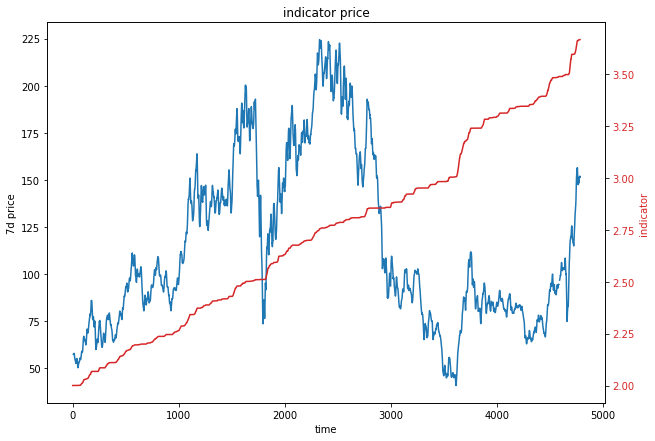

In [14]:
# Plot the data
fig, ax1 = plt.subplots()

plt.title("indicator price")
fig.set_figwidth(10)
fig.set_figheight(7)

color = 'tab:blue'
ax1.set_xlabel('time')
ax1.set_ylabel('7d price')
ax1.plot(data['7d_ma'])
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  

color = 'tab:red'
ax2.set_ylabel('indicator', color=color)
ax2.plot(data['trend'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

In [15]:
df = pd.DataFrame()
df['date'] = data['date']
df['price'] = data['close']
df['7d moving average'] = data['7d_ma']
df['30d moving average'] = data['30d_ma']
df['indicator'] = data['trend']

df[MOVING_AVERAGE_LONG_DURATION:]

,date,price,7d moving average,30d moving average,indicator
30,2001-10-29,53.029999,52.507143,55.568000,2.000000
31,2001-10-30,54.520000,52.761428,55.468000,2.000000
32,2001-10-31,54.529999,53.197143,55.361333,2.000000
33,2001-11-01,54.480000,53.581428,55.200333,2.000000
34,2001-11-02,55.830002,54.080000,55.121333,2.000000
...,...,...,...,...,...
4777,2020-09-08,147.979996,151.477142,151.293000,3.664701
4778,2020-09-09,154.800003,151.755713,151.210334,3.664701
4779,2020-09-10,152.339996,151.488569,151.098334,3.664701
4780,2020-09-11,150.339996,151.194284,151.101000,3.664701
